# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 9: Analiza danych przestrzennych z wykorzystaniem dedykowanych pakietów (część 3)

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pointpats as pp

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [6]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G = 1-np.exp(-intensity*np.pi*d**2)
    g = pd.DataFrame({'D': d, 'G': G})
    
    return g

### Wczytanie danych

Załączone do notatnika pliki zawierają dane niezbędne do wykonania zadań oraz dane wykorzystywane w zawartych w notatniku automatycznych testach. W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [8]:
# Wczytanie danych
data = gpd.read_file("data.zip", encoding="utf-8")
points_1 = gpd.read_file("points_1.zip", encoding="utf-8")
points_2 = gpd.read_file("points_2.zip", encoding="utf-8")
points_3 = gpd.read_file("points_3.zip", encoding="utf-8")

test_data_1 = gpd.read_file("test_data_1.zip", encoding="utf-8")
test_data_2 = gpd.read_file("test_data_2.zip", encoding="utf-8")
test_data_3 = gpd.read_file("test_data_3.zip", encoding="utf-8")

### Zadanie 1: Przygotowanie danych (7 pkt)

#### a) Przygotowanie danych wejściowych

Wykorzystując dane zawarte w zmiennej `data` przygotuj następujące tablice:

1) Tablica `powiaty` zawierająca następujące kolumny:
    - "Nazwa" - nazwy powiatów
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica `wojewodztwa` zawierająca następujące kolumny:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
3) Tablica `kraj` zawierająca następujące kolumny:
    - "Nazwa" - nazwa kraju
    - "geometry" - geometria obiektu


Wyświetl przygotowane tablice.

Uwagi do wykonania zadania:
 - Podczas konstrukcji tablic zawierających geometrie województw i kraju wykorzystaj funkcję `geopandas.GeoDataFrame.dissolve()`.

In [10]:
# Powiaty
powiaty = gpd.GeoDataFrame({"Nazwa":data["pow"],"geometry":data["geometry"]})
print(data)

                        pow             woj  \
0    ropczycko-sędziszowski    podkarpackie   
1                   łosicki     mazowieckie   
2              piaseczyński     mazowieckie   
3                  radomski     mazowieckie   
4                 sierpecki     mazowieckie   
..                      ...             ...   
375             nowodworski       pomorskie   
376                jaworski    dolnośląskie   
377               węgrowski     mazowieckie   
378             wejherowski       pomorskie   
379              staszowski  świętokrzyskie   

                                              geometry  
0    POLYGON ((692305.365 260282.248, 692313.646 26...  
1    POLYGON ((753920.175 497017.076, 753918.822 49...  
2    POLYGON ((644442.384 473992.041, 644345.678 47...  
3    POLYGON ((638056.482 404421.246, 638059.412 40...  
4    POLYGON ((534236.749 555932.727, 534235.027 55...  
..                                                 ...  
375  POLYGON ((521445.985 722541.335

In [11]:
# Komórka testowa
assert type(powiaty) == gpd.geodataframe.GeoDataFrame
assert powiaty.shape == (380, 2)
assert list(powiaty.columns) == ['Nazwa', 'geometry']

In [12]:
# Województwa
wojewodztwa = gpd.GeoDataFrame({"Nazwa":data["woj"],"geometry":data["geometry"]})
wojewodztwa = wojewodztwa.dissolve("Nazwa", as_index= False)
print(wojewodztwa)

                  Nazwa                                           geometry
0          dolnośląskie  POLYGON ((314611.15 311051.839, 314601.47 3110...
1    kujawsko-pomorskie  POLYGON ((478562.463 506967.539, 478548.952 50...
2             lubelskie  POLYGON ((741864.722 286667.036, 741870.576 28...
3              lubuskie  POLYGON ((229163.332 402782.45, 229144.276 402...
4           mazowieckie  POLYGON ((585701.782 466338.954, 585672.494 46...
5           małopolskie  POLYGON ((586410.706 163650.516, 586410.872 16...
6              opolskie  POLYGON ((432817.512 256749.768, 432795.398 25...
7          podkarpackie  POLYGON ((714304.962 168868.919, 714268.355 16...
8             podlaskie  POLYGON ((732344.671 544449.422, 732354.868 54...
9             pomorskie  POLYGON ((398449.594 638549.011, 398420.288 63...
10  warmińsko-mazurskie  POLYGON ((619320.115 606433.973, 619298.564 60...
11        wielkopolskie  POLYGON ((379469.996 421026.867, 379479.331 42...
12   zachodniopomorskie  

In [13]:
# Komórka testowa
assert type(wojewodztwa) == gpd.geodataframe.GeoDataFrame
assert wojewodztwa.shape == (16, 2)
assert list(wojewodztwa.columns) == ['Nazwa', 'geometry']

In [14]:
# Kraj
kraj = gpd.GeoDataFrame({"Nazwa":["Polska"],"geometry":data.dissolve()["geometry"][0]})

In [15]:
# Komórka testowa
assert type(kraj) == gpd.geodataframe.GeoDataFrame
assert kraj.shape == (1, 2)
assert list(kraj.columns) == ['Nazwa', 'geometry']

#### b) Wizualizacja danych wejściowych

Zwizualizuj dane wejściowe na pojedynczym wykresie tak by poszczególnej jednostki administracyjne nie posiadały wypełnienia, a ich granice były oznaczone coraz grubszymi i ciemniejszymi liniami wraz ze wzrostem ważności jednostek. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

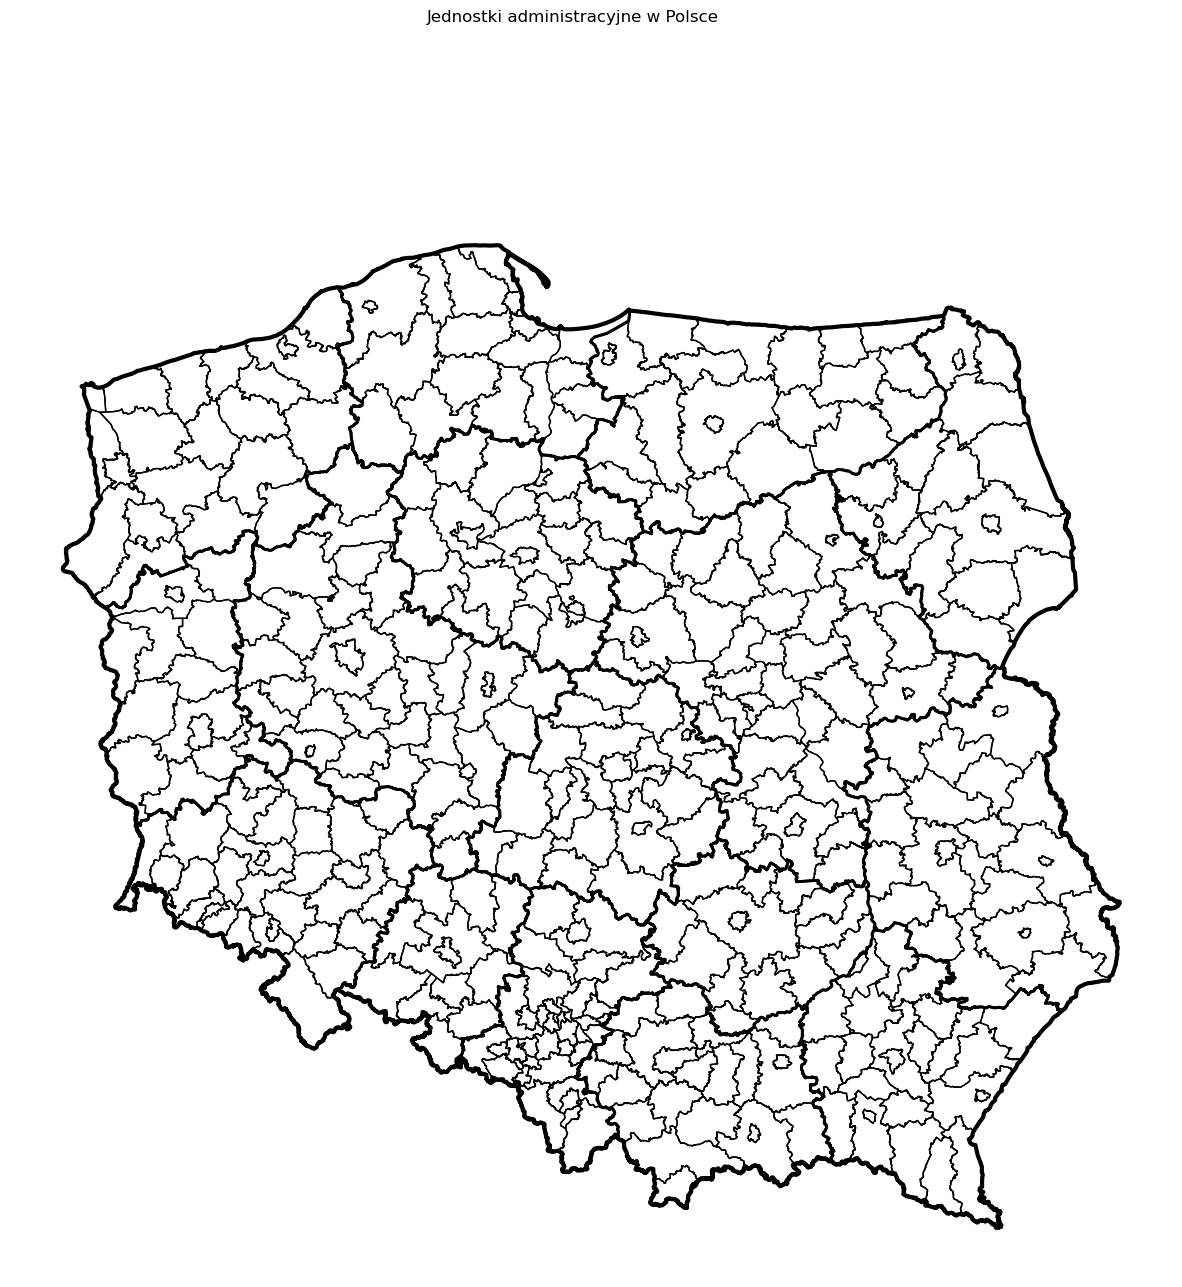

In [17]:
fig,ax = plt.subplots(figsize = [15,15])
fig.suptitle("Jednostki administracyjne w Polsce")
kraj.plot(ax=ax, linewidth = 3, color="None")
wojewodztwa.plot(ax=ax, linewidth = 2, color="None")
powiaty.plot(ax=ax, linewidth = 1, color="None")
ax.set_axis_off()

### Zadanie 2: Generowanie procesów punktowych z wykorzystaniem dedykowanych funkcji (przykłady) (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcje `homogeneous_poisson_on_polygon()` oraz `materna_on_polygon()`, które będzą generować odpowiednio jednorodny proces Poissona oraz proces punktowy Materna w obrębie dowolnego poligonu.

Alorytm postępowania:

Jednorodny proces Poissona:
 - losujemy liczbę punktów z rozkładu Poissona o wartości oczekiwanej równej iloczynowi intensywności procesu i powierzchni obszaru, na którym jest on generowany,
 - generujemy proces punktowy z wykorzystaniem funkcji  `geopandas.GeoSeries.sample_points()`,
 - dzielimy wygenerowaną chmurę punktów na indywidualne punkty korzystając z funkcji `geopandas.GeoSeries.explode()`.

Proces Materna:
 - losujemy liczbę klastrów z rozkładu Poissona o wartości oczekiwanej równej iloczynowi intensywności procesu macierzystego i powierzchni obszaru, na którym jest on generowany,
 - losujemy liczbę punktów z rozkładu Poissona o wartości oczekiwanej równej iloczynowi intensywności procesu potomnego i powierzchni obszaru, na którym jest on generowany,
 - generujemy proces punktowy z wykorzystaniem funkcji `geopandas.GeoSeries.sample_points()`,
 - dzielimy wygenerowaną chmurę punktów na indywidualne punkty korzystając z funkcji `geopandas.GeoSeries.explode()`.

Uwagi do wykonania zadania:
 - W zadaniu przedstawione są jedynie przykładowe rozkłady. Zastanów się które (i w jaki sposób) z pozostałych omawianych na ćwiczeniach rozkładów mogą być wygenerowane z wykorzystaniem funkcji `geopandas.GeoSeries.sample_points()`.

In [19]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.

    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    pole = polygon.area
    ilosc_pkt = np.random.poisson(pole*intensity)
    punkty = polygon.sample_points(ilosc_pkt)
    punkty = punkty.explode(index_parts=True)
    punkty = gpd.GeoDataFrame({"geometry":punkty})
    return punkty
    
def materna_on_polygon(parent_intensity, daughter_intensity, cluster_radius, polygon):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
  
    Returns
    -------
    points: GeoDataFrame
        Tablica geopandas zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym jak odwzorowanie zmiennej polygon.
    """
    pole = polygon.area[0]
    ilosc_clustrow = np.random.poisson(pole*parent_intensity)
    ilosc_pkt = np.random.poisson(pole*daughter_intensity)
    punkty = polygon.sample_points(method="cluster_poisson", size=ilosc_pkt, n_seeds=ilosc_clustrow, cluster_radius=cluster_radius)    
    punkty = punkty.explode(index_parts=True)
    punkty = gpd.GeoDataFrame({"geometry":punkty})
    return punkty

In [20]:
# Komórka testowa
test_results_1 = homogeneous_poisson_on_polygon(7*10**(-9), test_data_1)
assert type(test_results_1) == gpd.GeoDataFrame
assert list(test_results_1.columns) == ["geometry"]
assert np.all(test_results_1.within(test_data_1["geometry"][0]))

test_results_2 = materna_on_polygon(6*10**(-10), 9*10**(-9), 20000, test_data_1)
assert type(test_results_2) == gpd.GeoDataFrame
assert list(test_results_2.columns) == ["geometry"]
assert np.all(test_results_2.within(test_data_1["geometry"][0]))

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygenerowania następujących rozkładów punkotwych:

Rozkład 1 - jednorodny proces Poissona:
 - intensywność procesu: $5 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Polska
 
Rozkład 2 - proces Materna:
 - intensywność procesu macierzystego: $0.75 \cdot 10^{-10} pkt/m^2$ 
 - intensywność procesu potomnego: $2.5 \cdot 10^{-9} pkt/m^2$ 
 - promień klastra: $50 km$
 - obszar: Polska 
 
Rozkład 3 - jednorodny proces Poissona:
 - intensywność procesu: $6 \cdot 10^{-9} pkt/m^2$ 
 - obszar: Wielkopolska

Przedstaw wygenerowane rozkłady w postaci wykresów punktowego nałożonych na kontury granic kraju (rozkłady 1, 2) lub na kontury granic województw (rozkład 3). Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x3). Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Text(0.5, 1.0, 'Proces Poissona na ternie woj. wielkopolskiego')

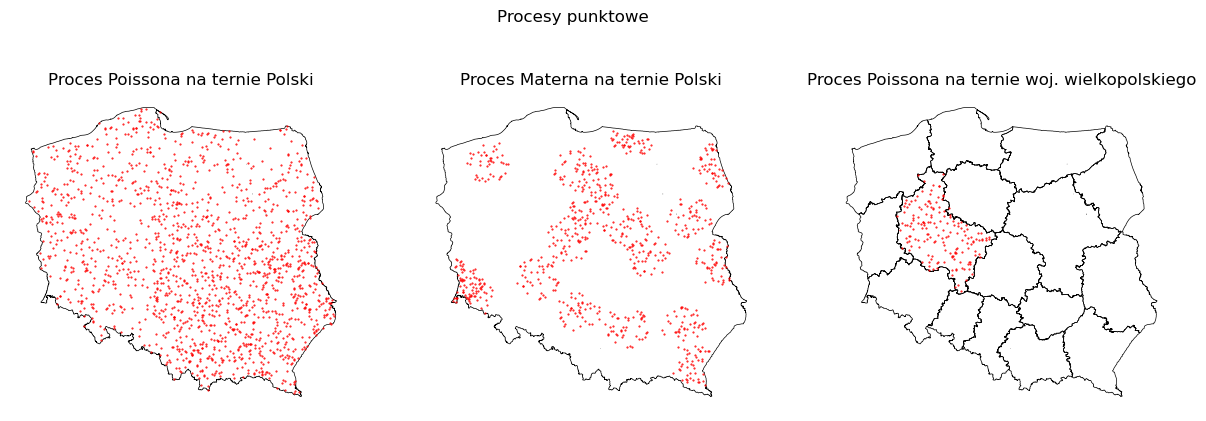

In [22]:
poisson_polska = homogeneous_poisson_on_polygon(5*1e-9, kraj)
materna_polska = materna_on_polygon(0.75*1e-10, 2.5*1e-9, 50000, kraj)
poisson_wielkopol = homogeneous_poisson_on_polygon(6*1e-9, wojewodztwa[wojewodztwa["Nazwa"] == "wielkopolskie"])

fig, ax = plt.subplots(1,3, figsize = (15,5))
fig.suptitle("Procesy punktowe")
kraj.plot(ax=ax[0], color="None", linewidth=0.5, edgecolor="black")
poisson_polska.plot(ax=ax[0], markersize=0.25, color="red")
ax[0].set_axis_off()
ax[0].set_title("Proces Poissona na ternie Polski")
kraj.plot(ax=ax[1], color="None", linewidth=0.5, edgecolor="black")
materna_polska.plot(ax=ax[1], markersize=0.25, color="red")
ax[1].set_axis_off()
ax[1].set_title("Proces Materna na ternie Polski")
wojewodztwa.plot(ax=ax[2], color="None", linewidth=0.5, edgecolor="black")
poisson_wielkopol.plot(ax=ax[2], markersize=0.25, color="red")
ax[2].set_axis_off()
ax[2].set_title("Proces Poissona na ternie woj. wielkopolskiego")

### Zadanie 3: Funkcja G (7 pkt)

#### a) Przygotowanie funkcji
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Uwagi do wykonania zadania:
 - Funkcja `pointpats.distance_statistics.g()` nie wymaga podania wszystkich parametrów wymienionych w dokumentacji. Do wykonania zadania niezbędne jest wykorzystanie jedynie parametrów `coordinates` i `support`.
 - Zwróć uwagę na format danych wejściowych jaki przyjmuje funkcja `pointpats.distance_statistics.g()`. W celu ekstrakcji współrzędnych z kolumny z geometrią można skorzystać z własności `geopandas.GeoSeries.x` i `geopandas.GeoSeries.y`.
 - Zadanie dotyczy przykładu generowania funkcji G z wykorzystaniem dedykowanej funkcji. Zastanów się jak wykonać identyczne zadanie w przypadku innych omawianych na ćwiczeniach funkcji.

In [24]:
help(pp.distance_statistics.g)

Help on function g in module pointpats.distance_statistics:

g(coordinates, support=None, distances=None, metric='euclidean', edge_correction=None)
    Ripley's G function

    The G function is computed from the cumulative density function of the nearest neighbor
    distances between points in the pattern.

    Parameters
    -----------
    coordinates : geopandas object | numpy.ndarray of shape (n,2)
        input coordinates to function
    support : tuple of length 1, 2, or 3, int, or numpy.ndarray
        tuple, encoding (stop,), (start, stop), or (start, stop, num)
        int, encoding number of equally-spaced intervals
        numpy.ndarray, used directly within numpy.histogram
    distances: numpy.ndarray, (n, n) or (n,)
        distances from every point in the point to another point in `coordinates`
    metric: str or callable
        distance metric to use when building search tree
    edge_correction: bool or str
        whether or not to conduct edge correction. Not yet

In [25]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoDataFrame
        Tablica zawierająca punkty zapisane w kolumnie "geometry" jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    coordinates = np.column_stack((np.array(points["geometry"].x), np.array(points["geometry"].y)))
    d_v,g_v = pp.distance_statistics.g(coordinates, intervals)
    g = pd.DataFrame({"D":d_v, "G": g_v})
    return g

g_function(test_data_2, 50)

,D,G
0,0.000000,0.000000
1,298.755633,0.014528
2,597.511267,0.062954
3,896.266900,0.162228
4,1195.022533,0.237288
5,1493.778167,0.338983
6,1792.533800,0.404358
7,2091.289433,0.515738
8,2390.045066,0.593220
9,2688.800700,0.641646


In [26]:
# Komórka testowa
test_results_3 = g_function(test_data_2, 50)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (50, 2)
assert list(test_results_3.columns) == ["D", "G"]
assert np.isclose(test_results_3["D"].min(), 0.0)
assert np.isclose(test_results_3["D"].max(), 14639.02603209451)
assert np.isclose(test_results_3["D"].mean(), 7319.513016047255)
assert np.isclose(test_results_3["G"].min(), 0.0)
assert np.isclose(test_results_3["G"].max(), 1.0)
assert np.isclose(test_results_3["G"].mean(), 0.8209685230024212)

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygenerowania danych dla rozkładów punktów `points_1`, `points_2` i `points_3`.

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji GF przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów na tle granic poligonu, w obrębie którego zostały wygenerowane w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

Uwagi do wykonania zadania:
- W części zadania dotyczącej generowania teoretycznej funkcji G jednorodnego rozkładu Poissona nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `g_function_poisson()`, którą można wkleić we wskazanej komórce na początku notatnika. 
- Wszystkie z analizowanych rozkładów punktów zostały wygenerowane w obrębie granic Polski. 

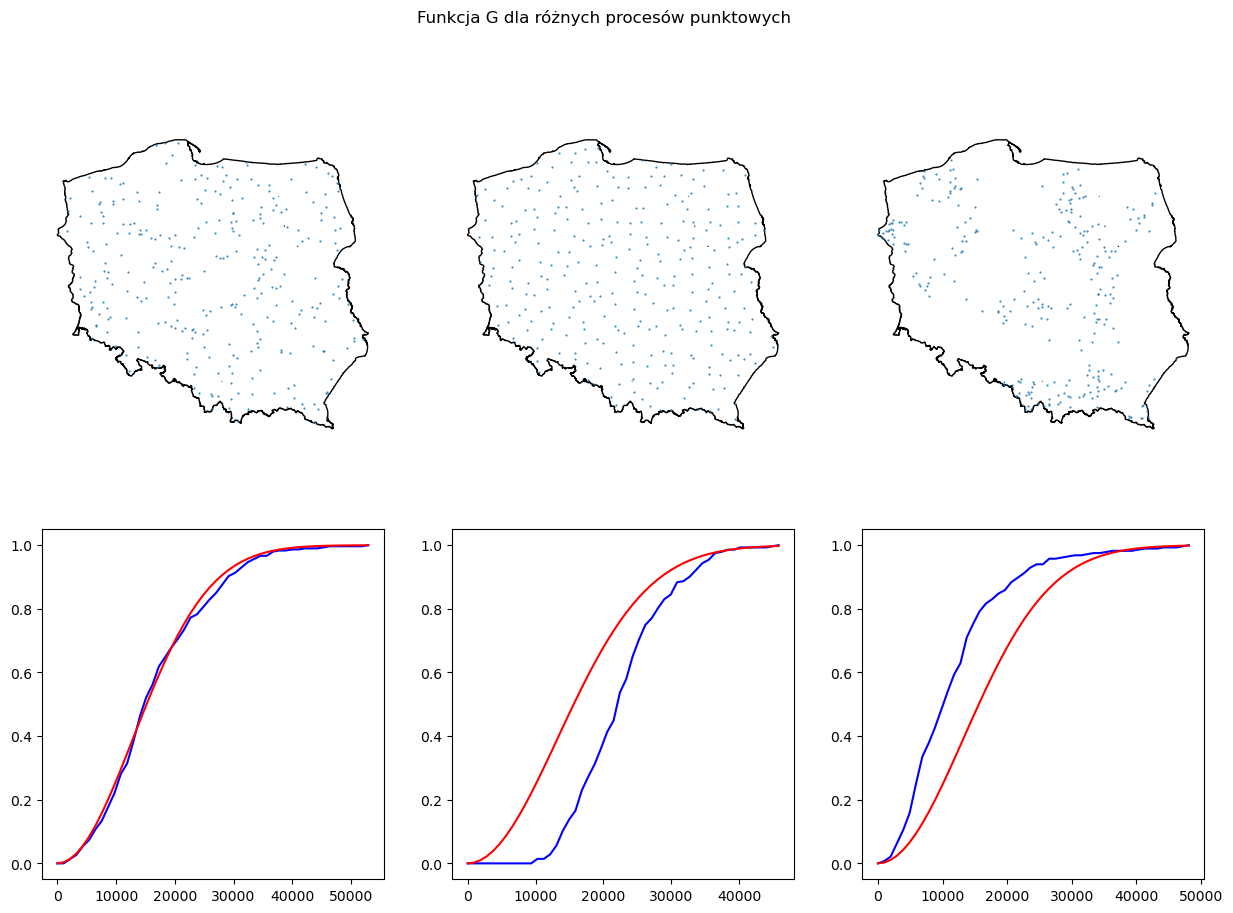

In [28]:
g_1 = g_function(points_1, 50)
g_2 = g_function(points_2, 50)
g_3 = g_function(points_3, 50)

i_1 = len(points_1)/kraj.area
i_2 = len(points_2)/kraj.area
i_3 = len(points_3)/kraj.area

g_p_1 = g_function_poisson(g_1["D"], i_1[0])
g_p_2 = g_function_poisson(g_2["D"], i_2[0])
g_p_3 = g_function_poisson(g_3["D"], i_3[0])

fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Funkcja G dla różnych procesów punktowych")
kraj.plot(ax=ax[0,0], color = "None")
points_1.plot(ax=ax[0,0], markersize = 0.25)
ax[0,0].set_axis_off()

kraj.plot(ax=ax[0,1], color = "None")
points_2.plot(ax=ax[0,1], markersize = 0.25)
ax[0,1].set_axis_off()

kraj.plot(ax=ax[0,2], color = "None")
points_3.plot(ax=ax[0,2], markersize = 0.25)
ax[0,2].set_axis_off()

ax[1,0].plot(g_1["D"],g_1["G"], color="blue")
ax[1,0].plot(g_p_1["D"],g_p_1["G"], color="red")

ax[1,1].plot(g_2["D"],g_2["G"], color="blue")
ax[1,1].plot(g_p_2["D"],g_p_2["G"], color="red")

ax[1,2].plot(g_3["D"],g_3["G"], color="blue")
ax[1,2].plot(g_p_3["D"],g_p_3["G"], color="red")                       

### Zadanie 4: Analiza Monte-Carlo na przykładzie funkcji G (16 pkt)

#### a) Przygotowanie funkcji

Korzystając z funkcji `pointpats.distance_statistics.g_test()` przygotuj funkcję `g_test_mc()`, która będzie przeprowadzała analizę Monte-Carlo funkcji G testowanego rozkładu punktów oraz przygotowywała dane niezbędne do wizualizacji wyników testu.

Funkcja `pointpats.distance_statistics.g_test()` może zostać wykorzystana do wielokrotnego zasymulowania jednorodnego procesu Poissona o intensywności równej intensywności testowanego procesu i wyliczeniu funkcji G dla każdego z zasymulowanych rozkładów. Funkcje te mogą posłużyć do wykreślenia obwiedni. Jeżeli funkcja G analizowanego rozkładu w całości znajduje się w obwiedni to nie ma podstaw do odrzucenia HO na rzecz H1. W przeciwnym przypadku następuje odrzucenie H0 na rzecz H1. Poziom istotności wykonywanego testu wynosi $\alpha= \frac{2}{n+1}$, gdzie $n$ to liczba wykonywanych symulacji.

Funkcja `g_test_mc()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = A".

Przykład komunikatu:
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>

Uwagi do wykonania zadania:
 - Funkcja `pointpats.distance_statistics.g_test()` nie wymaga podania wszystkich parametrów podanych w dokumentacji. Do wykonania zadania niezbędne jest wykorzystanie jedynie parametrów `coordinates`, `support`, `hull`, `keep_simulations` i `n_simulations`.
 - Zwróć uwagę na format danych wejściowych jaki przyjmuje funkcja `pointpats.distance_statistics.g_test()`. W celu ekstrakcji współrzędnych z kolumny z geometrią można skorzystać z własności `geopandas.GeoSeries.x` i `geopandas.GeoSeries.x`.
 - Zadanie dotyczy  analizy Monte-Carlo na przykładzie funkcji G. Zastanów się jak wykonać identyczne zadanie w przypadku innych omawianych na ćwiczeniach funkcji.

In [30]:
help(pp.distance_statistics.g_test)

Help on function g_test in module pointpats.distance_statistics:

g_test(coordinates, support=None, distances=None, metric='euclidean', hull=None, edge_correction=None, keep_simulations=False, n_simulations=9999)
    Ripley's G function

    The G function is computed from the cumulative density function of the nearest neighbor
    distances between points in the pattern.

    When the G function is below the simulated values, it suggests dispersion.

    Parameters
    ----------
    coordinates : geopandas object | numpy.ndarray, (n,2)
        input coordinates to function
    support : tuple of length 1, 2, or 3, int, or numpy.ndarray
        tuple, encoding (stop,), (start, stop), or (start, stop, num)
        int, encoding number of equally-spaced intervals
        numpy.ndarray, used directly within numpy.histogram
    distances: numpy.ndarray, (n, p) or (p,)
        distances from every point in a random point set of size p
        to some point in `coordinates`
    metric: str 

In [31]:
def g_test_mc(points, intervals, polygon, number_of_simulations):
    """
    Parameters
    -------
    points: GeoDataFrame
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do największej odległosci do najbliższego sąsiada.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
    number_of_simulations: int
        Liczba dodania określająca liczbę wykonywanych symulacji.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca cztery kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
        - "G_min" - zawierającą dolne wartości obwiedni funkcji G.
        - "G_max" - zawierającą górne wartości obwiedni funkcji G.
    alpha: float
        Poziom istotności testu.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """  
    coordinates = np.column_stack((np.array(points["geometry"].x), np.array(points["geometry"].y)))
    wynik = pp.distance_statistics.g_test(coordinates,support = intervals, hull = polygon["geometry"][0],keep_simulations=True, n_simulations = number_of_simulations)
    g=pd.DataFrame({"D": wynik[0], "G": wynik[1], "G_min": np.min(wynik[3], axis=0), "G_max": np.max(wynik[3], axis=0)})
    print(g.shape)
    alpha = 2/(number_of_simulations+1)
    print("H0: Testowana zmienna ma jednorodny rozkład losowy Poissona \nH1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona")
    if(len(g[g["G"]>=g["G_min"]])<len(g) or len(g[g["G"]<=g["G_max"]])<len(g)):
        H=1
        print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = ",alpha)
    else:
        H=0
        print("Brak podstaw do ordzucenia H0 na rzecz H1 na poziomie istotności {alpha}".format(alpha=alpha))
    return g, alpha, H

In [32]:
# Komórka testowa
test_results_4 = g_test_mc(test_data_2, 50, test_data_3, 19)

assert type(test_results_4[0]) == pd.DataFrame
assert test_results_4[0].shape == (50, 4)
assert list(test_results_4[0].columns) == ["D", "G", "G_min", "G_max"]
assert np.isclose(test_results_4[0]["D"].min(), 0.0)
assert np.isclose(test_results_4[0]["G"].min(), 0.0)
assert np.isclose(test_results_4[0]["G"].max(), 1.0)
assert np.isclose(test_results_4[0]["G_min"].min(), 0.0)
assert np.isclose(test_results_4[0]["G_min"].max(), 1.0)
assert np.isclose(test_results_4[0]["G_max"].min(), 0.0)
assert np.isclose(test_results_4[0]["G_max"].max(), 1.0)
assert np.isclose(test_results_4[1], 0.1)
assert np.isclose(test_results_4[2], 1)

(50, 4)
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona 
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.1


#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do przetestowania rozkładów punktów `points_1`, `points_2` i `points_3` na poziomie istotności $\alpha=0.05$. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G testowanych rozkładów punktów z zaznaczoną obwiednią wykorzystywaną w teście statystycznym. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów na tle granic poligonu, w obrębie którego zostały wygenerowane w górnym wierszu, a wykresy funkcji G wraz z obwiednią testu w dolnym wierszu figury.

Uwagi do wykonania zadania:
- Wszystkie z analizowanych rozkładów punktów zostały wygenerowane w obrębie granic Polski.

In [34]:
g_t_1 = g_test_mc(points_1, 50, kraj, 39)
g_t_2 = g_test_mc(points_2, 50, kraj, 39)
g_t_3 = g_test_mc(points_3, 50, kraj, 39)

(50, 4)
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona 
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Brak podstaw do ordzucenia H0 na rzecz H1 na poziomie istotności 0.05
(50, 4)
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona 
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.05
(50, 4)
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona 
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.05


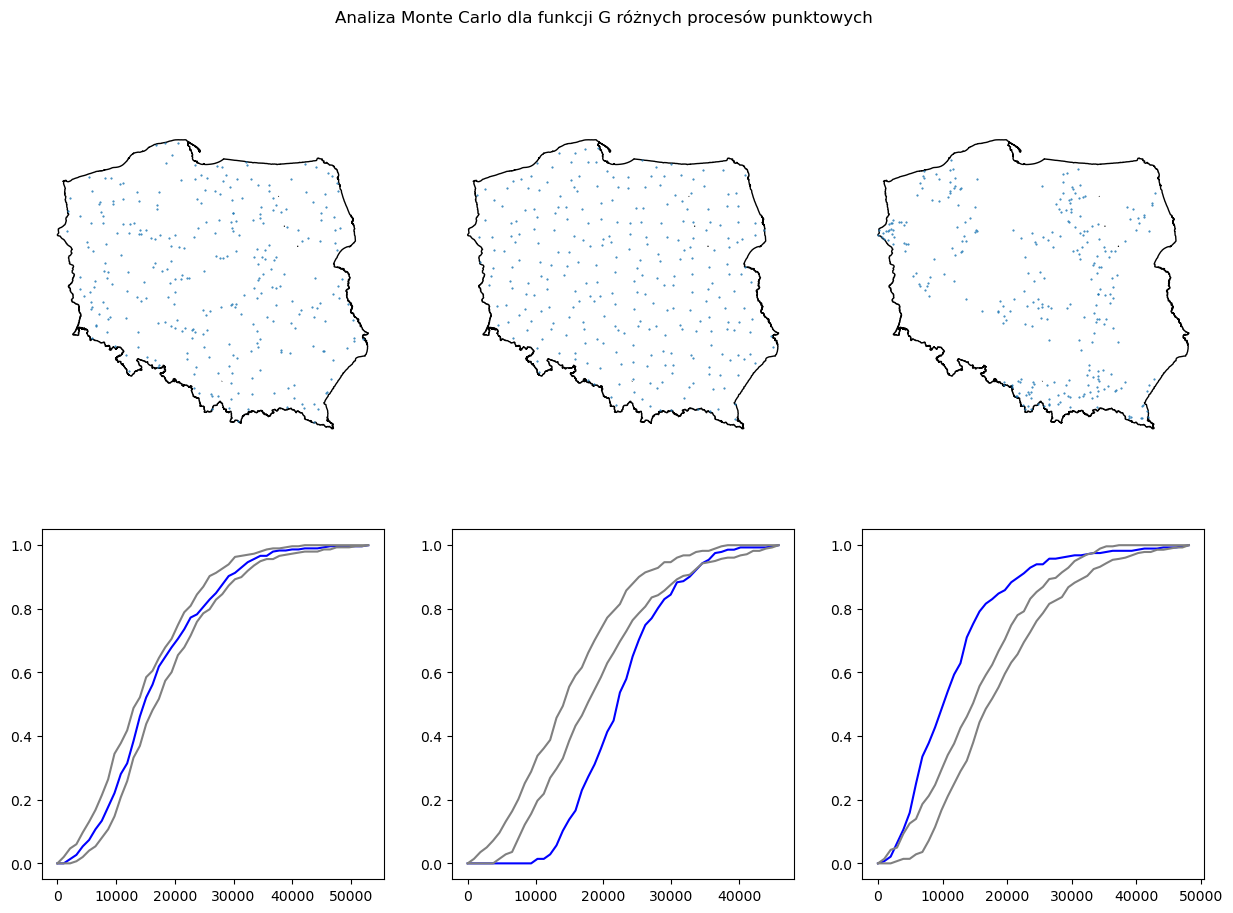

In [35]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Analiza Monte Carlo dla funkcji G różnych procesów punktowych")

kraj.plot(ax=ax[0,0], color = "None")
points_1.plot(ax=ax[0,0], markersize = 0.25)
ax[0,0].set_axis_off()

kraj.plot(ax=ax[0,1], color = "None")
points_2.plot(ax=ax[0,1], markersize = 0.25)
ax[0,1].set_axis_off()

kraj.plot(ax=ax[0,2], color = "None")
points_3.plot(ax=ax[0,2], markersize = 0.25)
ax[0,2].set_axis_off()

ax[1,0].plot(g_t_1[0]["D"],g_t_1[0]["G"], color="blue")
ax[1,0].plot(g_t_1[0]["D"],g_t_1[0]["G_min"], color="grey")
ax[1,0].plot(g_t_1[0]["D"],g_t_1[0]["G_max"], color="grey")

ax[1,1].plot(g_t_2[0]["D"],g_t_2[0]["G"], color="blue")
ax[1,1].plot(g_t_2[0]["D"],g_t_2[0]["G_min"], color="grey")
ax[1,1].plot(g_t_2[0]["D"],g_t_2[0]["G_max"], color="grey")

ax[1,2].plot(g_t_3[0]["D"],g_t_3[0]["G"], color="blue")
ax[1,2].plot(g_t_3[0]["D"],g_t_3[0]["G_min"], color="grey")  
ax[1,2].plot(g_t_3[0]["D"],g_t_3[0]["G_max"], color="grey")  